In [1]:
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import requests
import numpy as np
import seaborn as sns


In [69]:
df = pd.DataFrame([])
for name in ['Jan','Feb','Mar','Apr','May']:
    tmp = pd.read_excel('HEDNO_overpwr_'+name+'_2024.xlsx', engine='openpyxl')
    tmp = tmp.loc[(tmp['Nr. of power alarms L1']+ tmp['Nr. of power alarms L2'] + tmp['Nr. of power alarms L3'])>0]
    summary = pd.DataFrame(columns=['Installation', 'Transformer', 'Nr. of power alarms',
       'Avg duration of power alarms (minutes)',
       'Avg % of exceeding threshold'])
    
    grouped = tmp.groupby('Transformer')
    for i, group in grouped:


        group['Nr. of power alarms'] = group['Nr. of power alarms L1']+group['Nr. of power alarms L2']+group['Nr. of power alarms L3']
        group['Avg duration of power alarms (minutes)'] = group[['Avg duration of power alarms L1 (min)','Avg duration of power alarms L2 (min)','Avg duration of power alarms L3 (min)']].mean(axis=1)
        group['Avg % of exceeding threshold'] = group[['Avg % of exceeding threshold L1','Avg % of exceeding threshold L2','Avg % of exceeding threshold L3']].mean(axis=1)
        
        #group['Min duration of power alarms'] = np.min(group['Min duration of power alarms L1 (min)'],group['Min duration of power alarms L2 (min)'],group['Min duration of power alarms L3 (min)'])
        #group['Max duration of power alarms'] = np.max(group['Max duration of power alarms L1 (min)'],group['Max duration of power alarms L2 (min)'],group['Max duration of power alarms L3 (min)'])

        group = group.drop(['Nr. of power alarms L1','Avg duration of power alarms L1 (min)','Avg % of exceeding threshold L1','Nr. of power alarms L2','Avg duration of power alarms L2 (min)','Avg % of exceeding threshold L2','Nr. of power alarms L3','Avg duration of power alarms L3 (min)','Avg % of exceeding threshold L3'],axis=1)
        group = pd.DataFrame(group.iloc[0]).transpose()
        summary = summary.append(group, ignore_index=True)

    summary = summary.sort_values(by='Nr. of power alarms', ascending=False)

    # for col in ['Nr. of power alarms','Avg duration of power alarms (minutes)','Avg % of exceeding threshold']:
    #     summary['norm_'+col]=(summary[col] - summary[col].min()) / (summary[col].max() - summary[col].min())
    # weights = [0.5, 1, 0.5]

    # summary['Overpower KPI'] = weights[0]*summary['norm_Nr. of power alarms']*weights[1]*summary['norm_Avg % of exceeding threshold']*weights[2]*summary['norm_Avg duration of power alarms (minutes)']
    # summary = summary.round({'Overpower KPI':2})
    # # summary.to_excel('HEDNO_overpwr_aggregated_'+name+'_2024.xlsx', index=False)
    summary['month'] = name+' 2024'
    # summary = summary[['Installation','Transformer','Overpower KPI','month']]

    df = pd.concat([df,summary])



C:\Users\EmilyP\AppData\Local\Temp\ipykernel_936\2015885352.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(group, ignore_index=True)
C:\Users\EmilyP\AppData\Local\Temp\ipykernel_936\2015885352.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(group, ignore_index=True)
C:\Users\EmilyP\AppData\Local\Temp\ipykernel_936\2015885352.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(group, ignore_index=True)
C:\Users\EmilyP\AppData\Local\Temp\ipykernel_936\2015885352.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(group, ignore_

In [71]:
for col in ['Nr. of power alarms','Avg duration of power alarms (minutes)','Avg % of exceeding threshold']:
    df['norm_'+col]=(df[col] - df[col].min()) / (df[col].max() - df[col].min())
weights = [1, 1, 1]

df['Overpower KPI'] = 100*weights[0]*df['norm_Nr. of power alarms']*weights[1]*df['norm_Avg % of exceeding threshold']*weights[2]*df['norm_Avg duration of power alarms (minutes)']
df = df.round({'Overpower KPI':2})
df

,Installation,Transformer,Nr. of power alarms,Avg duration of power alarms (minutes),Avg % of exceeding threshold,month,norm_Nr. of power alarms,norm_Avg duration of power alarms (minutes),norm_Avg % of exceeding threshold,Overpower KPI
4,ΜΠ-051 Κ/Δ ΠΑΛΛΗΝΗΣ,ΜΠ-004,1920,16.379013,4.631914,Jan 2024,1.0,0.463223,0.032367,1.499305
5,ΜΠ-22 Κ/Δ ΠΑΛΛΗΝΗΣ,ΜΠ-013,1915,20.126173,4.142901,Jan 2024,0.997394,0.57609,0.027884,1.602161
3,Ρ-260 ΝΕΑΣ ΜΑΚΡΗΣ,ΜΝ-010,511,6.211102,2.522979,Jan 2024,0.265763,0.156961,0.013033,0.054365
0,1-15 ΜΑΡΚΟΠΟΥΛΟΥ,MM-185,297,6.441013,2.423965,Jan 2024,0.154247,0.163886,0.012125,0.03065
9,ΜΠ-161 ΠΑΛΛΗΝΗΣ,ΜΠ-297,76,2.203125,1.101416,Jan 2024,0.039083,0.036239,0.0,0.0
2,Ρ 3-19 ΜΑΡΚΟΠΟΥΛΟΥ,ΜΜ-423,61,1.84543,8.880033,Jan 2024,0.031266,0.025465,0.071313,0.005678
7,Ρ-400 ΣΠΑΤΩΝ,ΜΠ-110,24,3.119048,1.9936,Jan 2024,0.011985,0.063827,0.008179,0.000626
6,ΜΠ-046 Κ/Δ ΠΑΛΛΗΝΗΣ,ΜΠ-046,7,1.45,1.634443,Jan 2024,0.003127,0.013554,0.004887,0.000021
1,Ρ-380 ΣΠΑΤΩΝ,MM-359,5,34.2,110.179198,Jan 2024,0.002084,1.0,1.0,0.208442
10,Ρ-210 ΝΕΑΣ ΜΑΚΡΗΣ,ΜΤ-055,2,2.5,2.499743,Jan 2024,0.000521,0.045181,0.01282,0.00003


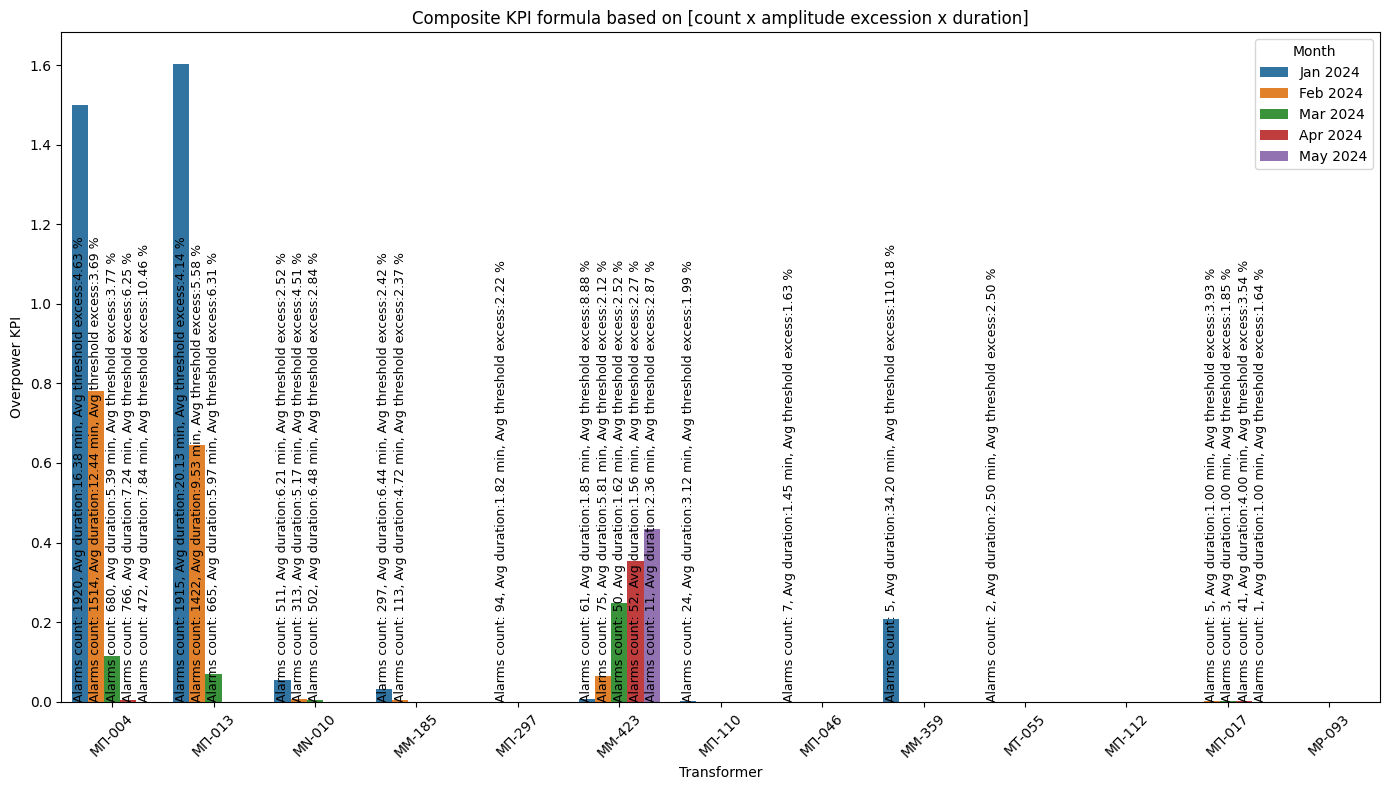

In [85]:
# 2D plot

# Create the grouped bar plot
fig = plt.figure(figsize=(14, 8))
barplot  = sns.barplot(data=df, x='Transformer', y='Overpower KPI', hue='month')

# Set plot labels and title
plt.xlabel('Transformer')
plt.ylabel('Overpower KPI')
# plt.title('Composite KPI based on count/amplitude excession/duration with weights '+str(weights[0])+' / '+str(weights[1])+' / '+str(weights[2]))
plt.title('Composite KPI formula based on [count x amplitude excession x duration]')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.tight_layout()
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with a height greater than 0
        # Get the index of the bar in the plot
        bar_index = barplot.patches.index(p)
        
        # Find the corresponding row in the DataFrame
        row = df.iloc[bar_index]
        
        # Extract the values for the annotation
        nr_power_alarms = row['Nr. of power alarms']
        avg_duration = row['Avg duration of power alarms (minutes)']
        avg_excess = row['Avg % of exceeding threshold']
        # Create the annotation label
        label = f'Alarms count: {nr_power_alarms}, Avg duration:{avg_duration:.2f} min, Avg threshold excess:{avg_excess:.2f} %'
        
        # Annotate the bar
        barplot.text(p.get_x() + p.get_width() / 2., 0,
                     label, ha='center', va='bottom', rotation=90, fontsize=9, color='black')

        # barplot.text(p.get_x() + p.get_width() / 2., height / 2,
        #              label, ha='center', va='center', rotation=90, fontsize=9, color='white')

plt.savefig('groupedPowerKPI_product_labels.png', dpi=300)
# Show the plot
plt.show()

In [66]:
df.to_excel('aggregated_normalized.xlsx', index=False)